In [1]:
import numpy as np
from faceted import faceted as fc
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib as mpl
import pretty_plotting_funcs as ppf
from matplotlib import cm
import cartopy.crs as ccrs
import pickle
import cartopy.crs as ccrs
from global_land_mask import globe
import warnings
from scipy.signal import argrelextrema, argrelmax
import scipy as sp
import cloud_program as cp
import cloud_constants as cc
from global_land_mask import globe
from cartopy.util import add_cyclic_point
import cartopy.util as cutil
import statistics as st
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches


warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']
mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi']= 600
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
lightblue = '#bde0e7'
lightblue = '#8dcad6'
blue = '#2b7db5'
gold = '#d19711'

In [3]:
path = '/data/bmckim/natgeo2024/'

In [4]:
ceres_cre_sw = xr.open_dataarray(path+'ceres_cre_sw.nc')
ceres_cre_lw = xr.open_dataarray(path+'ceres_cre_lw.nc')
ceres_cre = xr.open_dataarray(path+'ceres_cre.nc')

inferred_cre_sw = xr.open_dataarray(path+'inferred_cre_sw.nc')
inferred_cre_lw = xr.open_dataarray(path+'inferred_cre_lw.nc')
inferred_cre = xr.open_dataarray(path+'inferred_cre.nc')

fh = xr.open_dataarray(path+'fh.nc')
fl = xr.open_dataarray(path+'fl.nc')
fh_timeseries = xr.open_dataarray(path+'fh_timeseries.nc')

ts = xr.open_dataarray(path+'ts.nc')

high_albedos = np.load(path+'high_albedos.npy')

inferred_cre_l = xr.open_dataarray(path+'inferred_cre_l.nc')
inferred_cre_h = xr.open_dataarray(path+'inferred_cre_h.nc')
inferred_cre_h_sw = xr.open_dataarray(path+'inferred_cre_h_sw.nc')
inferred_cre_h_lw = xr.open_dataarray(path+'inferred_cre_h_lw.nc')
inferred_m_lh = xr.open_dataarray(path+'inferred_m_lh.nc')

In [5]:
ceres_cre_mean = cp.area_weighted_mean(ceres_cre).mean().values
ceres_cre_sw_mean = cp.area_weighted_mean(ceres_cre_sw).mean().values
ceres_cre_lw_mean = cp.area_weighted_mean(ceres_cre_lw).mean().values

inferred_cre_mean = cp.area_weighted_mean(inferred_cre).mean().values
inferred_cre_sw_mean = cp.area_weighted_mean(inferred_cre_sw).mean().values
inferred_cre_lw_mean = cp.area_weighted_mean(inferred_cre_lw).mean().values

In [6]:
inferred_cre_mean = cp.area_weighted_mean(inferred_cre).mean().values
inferred_cre_l_mean = cp.area_weighted_mean(inferred_cre_l).mean().values
inferred_m_lh_mean = cp.area_weighted_mean(inferred_m_lh).mean().values
inferred_cre_h_sw_mean = cp.area_weighted_mean(inferred_cre_h_sw).mean().values
inferred_cre_h_lw_mean = cp.area_weighted_mean(inferred_cre_h_lw).mean().values
inferred_cre_h_mean = cp.area_weighted_mean(inferred_cre_h).mean().values

In [7]:
fh_mean = cp.area_weighted_mean(fh).mean().values
fl_mean = cp.area_weighted_mean(fl).mean().values

In [8]:
fh_log = np.log(fh_timeseries)
fh_log_weighted = cp.area_weighted_mean(fh_log)
fh_log_annual = cp.group_data(fh_log_weighted)

ts_weighted = cp.area_weighted_mean(ts)
ts_annual = cp.group_data(ts_weighted)

In [9]:
inferred_sig_cre = inferred_cre.std().values
inferred_sig_cre_l = inferred_cre_l.std().values
inferred_sig_cre_lh = inferred_m_lh.std().values
inferred_sig_cre_h_sw = inferred_cre_h_sw.std().values
inferred_sig_cre_h_lw = inferred_cre_h_lw.std().values
inferred_sig_cre_h = inferred_cre_h.std().values

In [10]:
high_albedos = np.load(path+'high_albedos.npy')

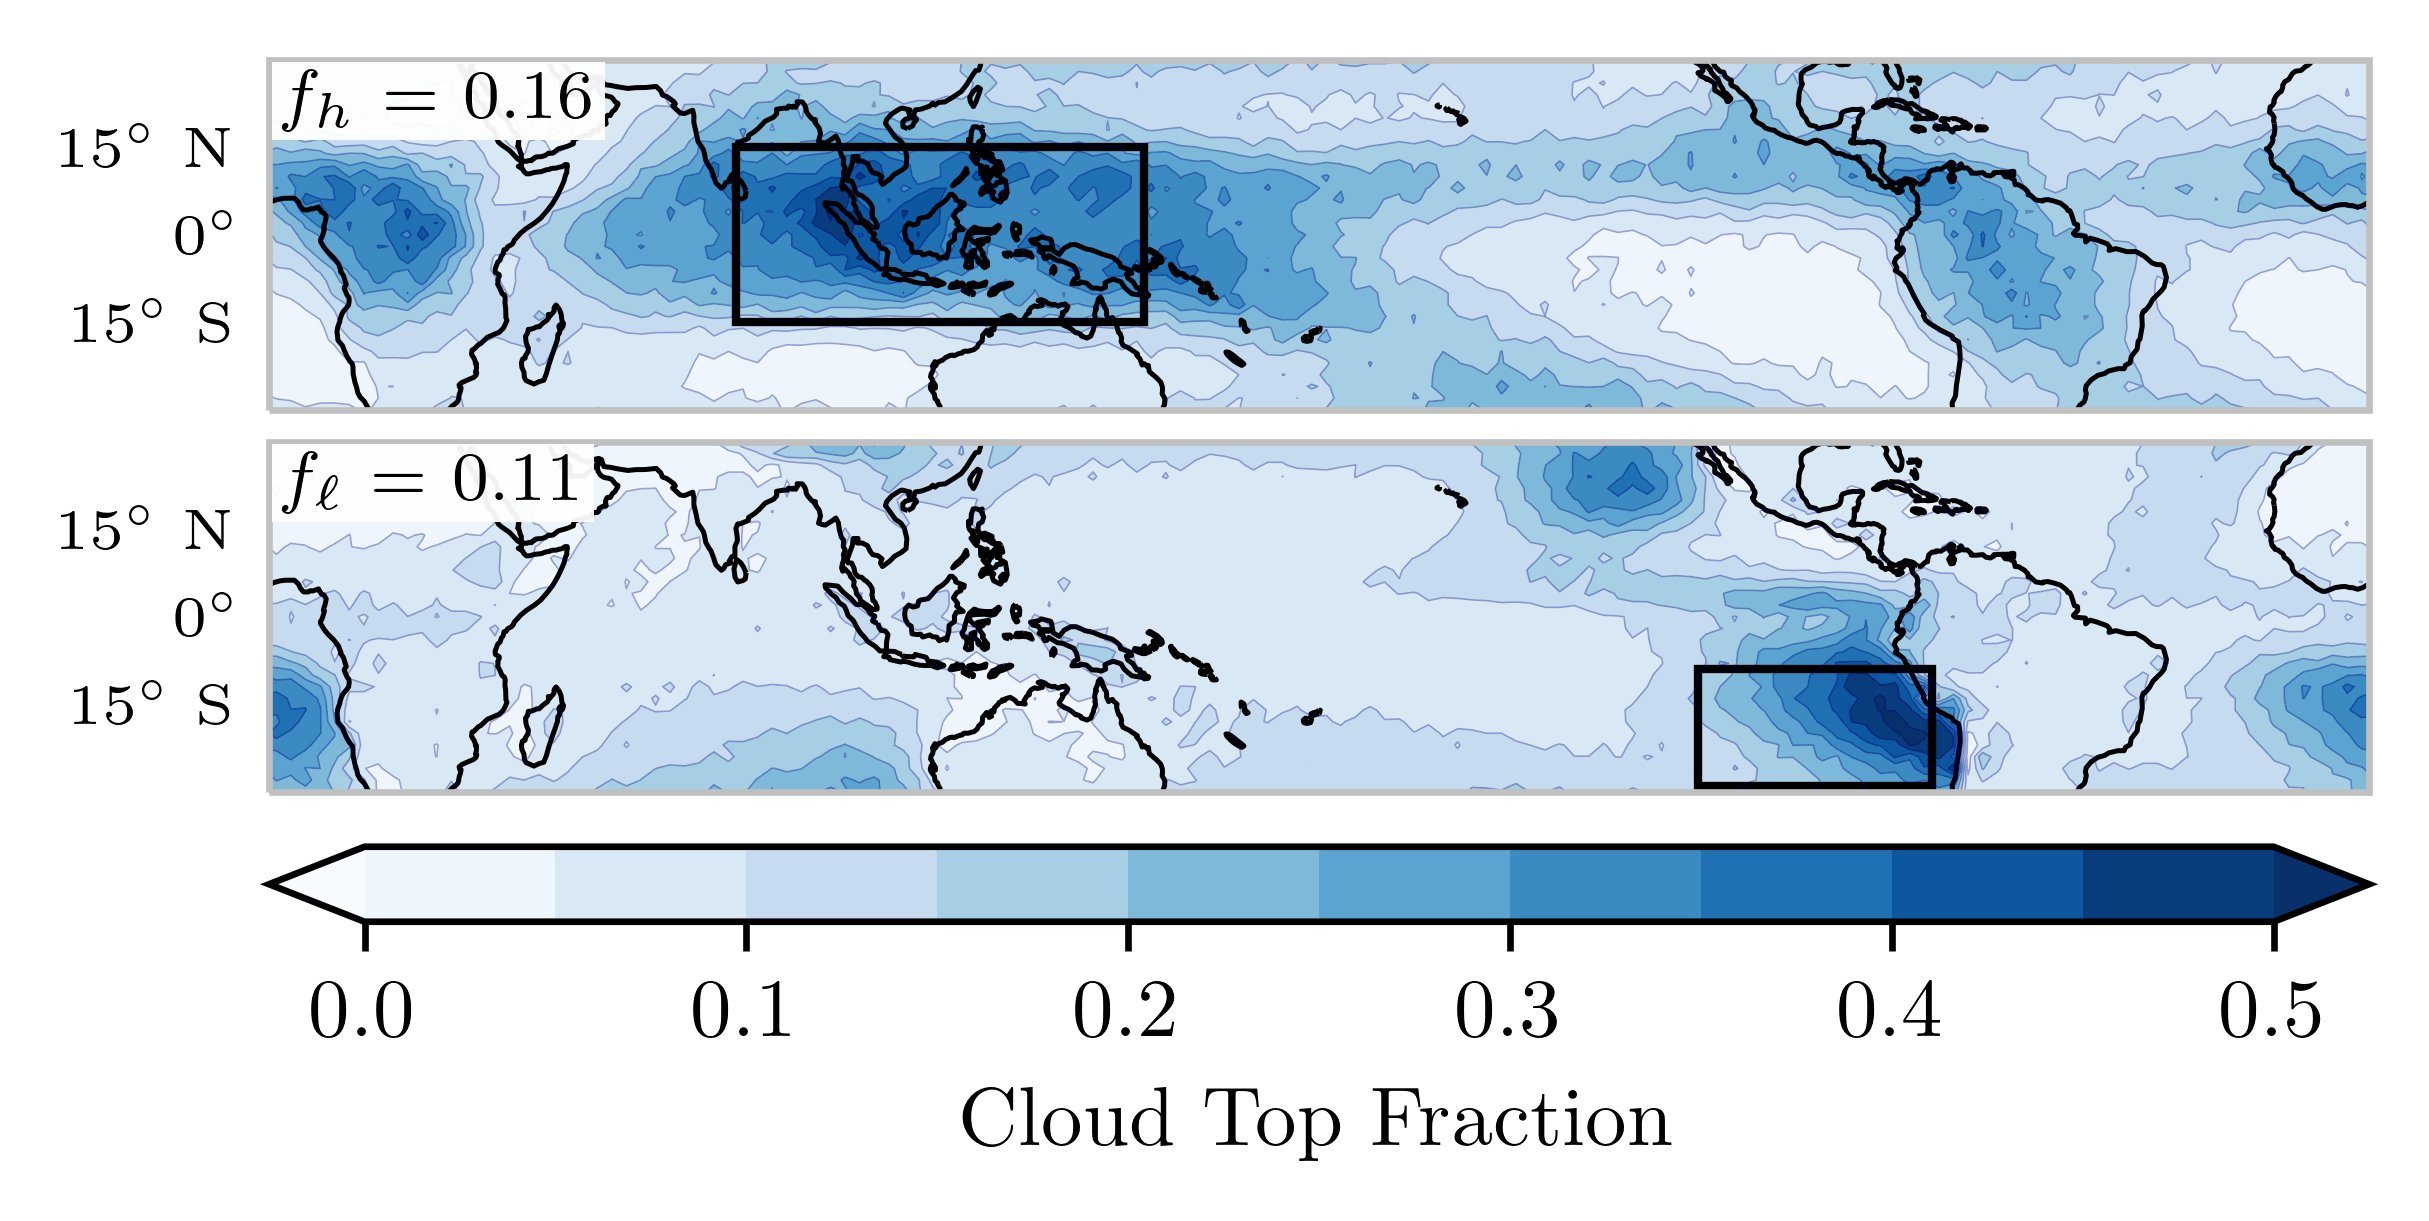

In [11]:
#####################################################################    
############## PLOT CLOUD FRACTION (Figure 2a,b) ####################
#####################################################################

from cartopy.util import add_cyclic_point
import cartopy.util as cutil


cdata, cyclic_lons = add_cyclic_point(fh.values, coord=fh.lon.values)
fig, axes, cax = fc(2,1, width=4, aspect=60/180, bottom_pad=-0.5, cbar_mode='single', internal_pad = -0.53, cbar_pad=-0.2, cbar_location = 'bottom', cbar_short_side_pad=0, axes_kwargs={'projection': ccrs.PlateCarree(central_longitude=180)})
ax = axes[0]
c1 = ax.contourf(cyclic_lons, fh.lat.values, cdata, add_colorbar=False, vmin=0, vmax=0.5, cmap='Blues', transform=ccrs.PlateCarree(central_longitude=0), levels=np.linspace(0,0.5,11), extend='both')
c2 = ax.contour( cyclic_lons, fh.lat.values, cdata, add_colorbar=False, vmin=0, vmax=0.5, transform=ccrs.PlateCarree(central_longitude=0), levels=np.linspace(0,0.5,11), colors='navy', linewidths=0.2, alpha=0.3, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$f_h$ = '+str(np.round(fh_mean,2)), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.add_patch(mpatches.Rectangle(xy=[80, -15], width=70, height=30, facecolor=None, edgecolor='k',
                                    alpha=1, fill=False,linewidth=1,transform=ccrs.PlateCarree()))

cdata, cyclic_lons = add_cyclic_point(fl.values, coord=fl.lon.values)
ax = axes[1]
c1 = ax.contourf(cyclic_lons, fl.lat.values, cdata, add_colorbar=False, vmin=0, vmax=0.5, cmap='Blues', transform=ccrs.PlateCarree(central_longitude=0), levels=np.linspace(0,0.5,11), extend='both')
c2 = ax.contour( cyclic_lons, fl.lat.values, cdata, add_colorbar=False, vmin=0, vmax=0.5, transform=ccrs.PlateCarree(central_longitude=0), levels=np.linspace(0,0.5,11), colors='navy', linewidths=0.2, alpha=0.3,extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$f_\ell$ = '+str(np.round(fl_mean,2)), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.add_patch(mpatches.Rectangle(xy=[-115, -29], width=40, height=20, facecolor=None, edgecolor='k',
                                    alpha=1, fill=False,linewidth=1,transform=ccrs.PlateCarree()))
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver' ,width=0)
ax.set_xticklabels(['','','','','','',''],color='k', fontsize='x-small')

for ax in axes:
    ax.tick_params(axis='both', direction='in', top=True, right=True, left=True, bottom=True)
    ax.spines['geo'].set_edgecolor('silver')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.set_yticks([-15, 0, 15])
    ax.tick_params(axis='y', colors='silver', width=0)
    ax.set_yticklabels([r'$15^\circ$ S', r'$0^\circ$', r'$15^\circ$ N'],color='k', fontsize='x-small')

plt.colorbar(c1, cax=cax, orientation='horizontal', label='Cloud Top Fraction', ticks=np.linspace(0,0.5,6), extend='both')

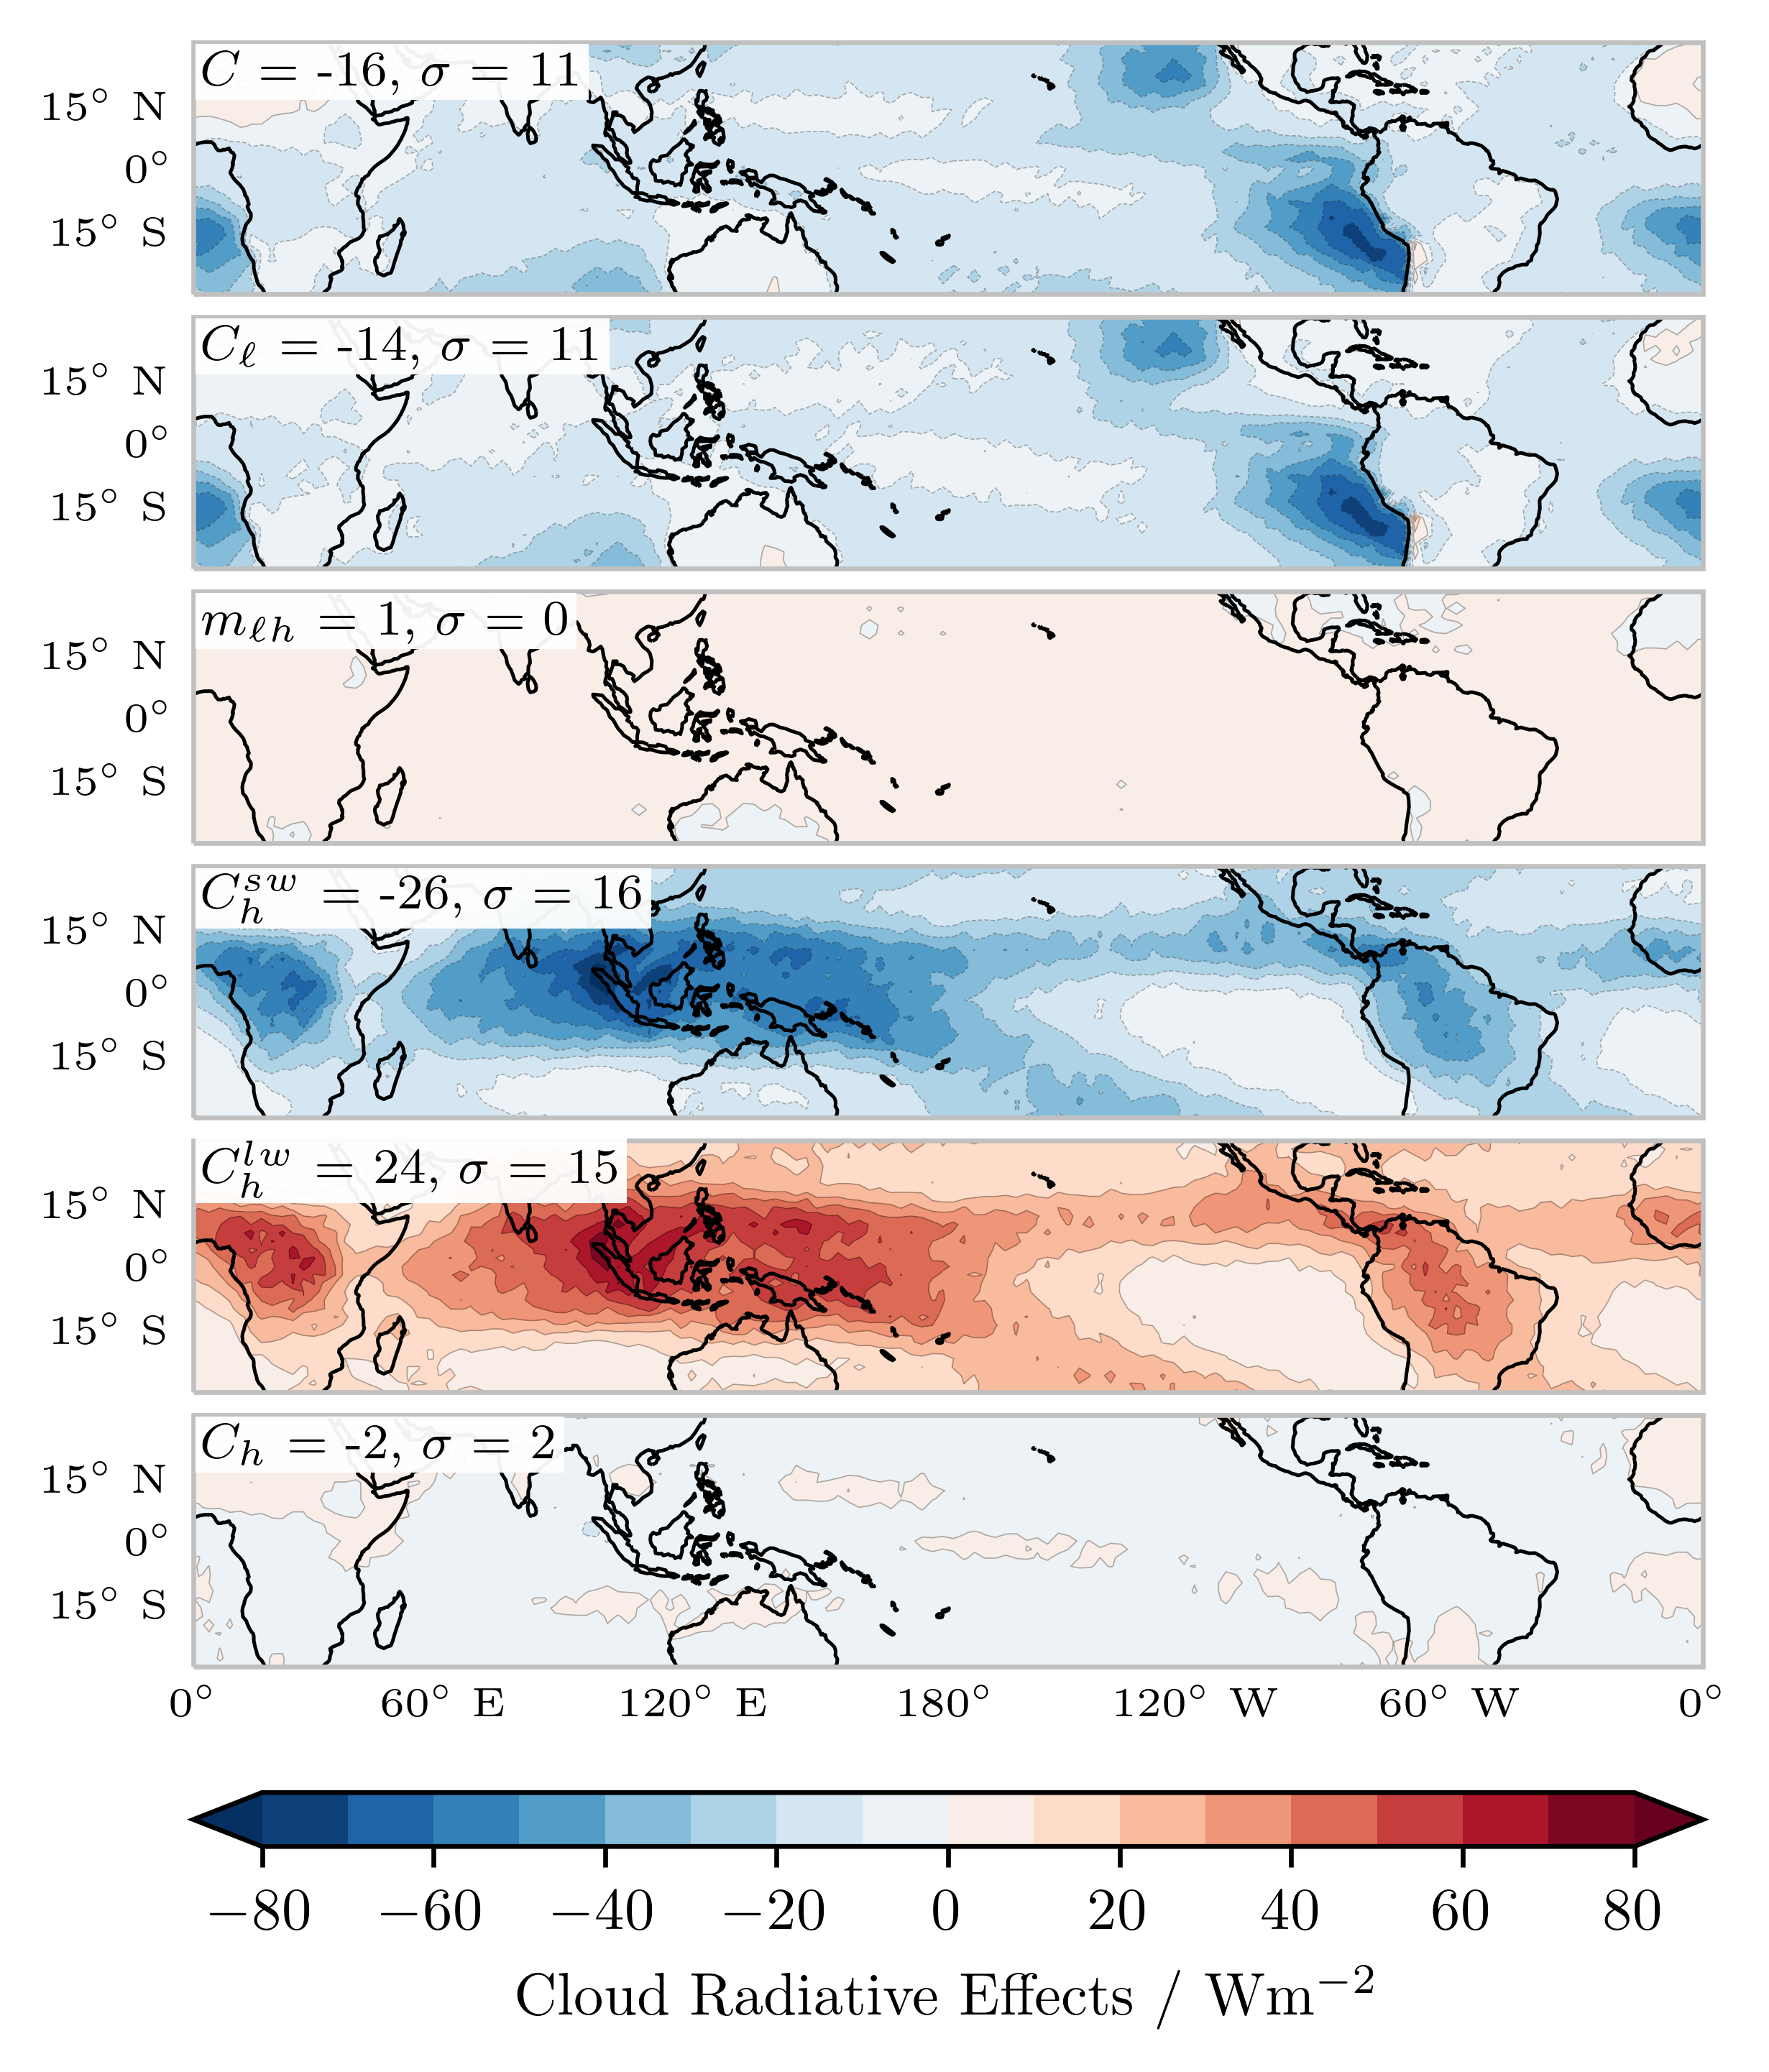

In [12]:
#####################################################################    
################# PLOT CLIMATOLOGY (Figure 2c-h) ####################
#####################################################################
vmin=-80
vmax=80
num_levels = 17
fig, axes, cax = fc(6,1, width=4, aspect=60/180, bottom_pad=-0.5, cbar_mode='single', internal_pad = -0.53, cbar_pad=0, cbar_location = 'bottom', cbar_short_side_pad=0, axes_kwargs={'projection': ccrs.PlateCarree(central_longitude=180)})

lon = 0
ax = axes[0]
cdata, cyclic_lons = add_cyclic_point(inferred_cre.values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, cmap='RdBu_r', transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels),extend='both')
c2 = ax.contour(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), colors='k', linewidths=0.2, alpha=0.3, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C$ = '+str(int(np.round(inferred_cre_mean)))+', $\sigma$ = '+str(int(np.round(inferred_sig_cre))), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=.95, linewidth=0,pad=1.))

ax = axes[1]
cdata, cyclic_lons = add_cyclic_point(inferred_cre_l.values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, cmap='RdBu_r', transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), extend='both')
c2 = ax.contour(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), colors='k', linewidths=0.2, alpha=0.3, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C_\ell$ = '+str(int(np.round(inferred_cre_l_mean)))+', $\sigma$ = '+str(int(np.round(inferred_sig_cre_l))), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=.95, linewidth=0,pad=1.))

ax = axes[2]
cdata, cyclic_lons = add_cyclic_point(inferred_m_lh.values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, cmap='RdBu_r', transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), extend='both')
c2 = ax.contour(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), colors='k', linewidths=0.2, alpha=0.3, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$m_{\ell h}$ = '+str(int(np.round(inferred_m_lh_mean)))+', $\sigma$ = '+str(int(np.round(inferred_sig_cre_lh))), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=.95, linewidth=0,pad=1.))

ax = axes[3]
cdata, cyclic_lons = add_cyclic_point(inferred_cre_h_sw.values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, cmap='RdBu_r', transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), extend='both')
c2 = ax.contour(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), colors='k', linewidths=0.2, alpha=0.3, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C_h^{sw}$ = '+str(int(np.round(inferred_cre_h_sw_mean)))+', $\sigma$ = '+str(int(np.round(inferred_sig_cre_h_sw))), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=.95, linewidth=0,pad=1.))

ax = axes[4]
cdata, cyclic_lons = add_cyclic_point(inferred_cre_h_lw.values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, cmap='RdBu_r', transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), extend='both')
c2 = ax.contour(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), colors='k', linewidths=0.2, alpha=0.3, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C_h^{lw}$ = '+str(int(np.round(inferred_cre_h_lw_mean)))+', $\sigma$ = '+str(int(np.round(inferred_sig_cre_h_lw))), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=.95, linewidth=0,pad=1.))

ax = axes[5]
cdata, cyclic_lons = add_cyclic_point(inferred_cre_h.values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, cmap='RdBu_r', transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), extend='both')
c2 = ax.contour(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(vmin,vmax,num_levels), colors='k', linewidths=0.2, alpha=0.3, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C_h$ = '+str(int(np.round(inferred_cre_h_mean)))+', $\sigma$ = '+str(int(np.round(inferred_sig_cre_h))), color='k', fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=.95, linewidth=0,pad=1.))
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver', width=0)
ax.set_xticklabels([r'$0^\circ$',r'$60^\circ$ E', r'$120^\circ$ E', r'$180^\circ$', r'$120^\circ$ W', r'$60^\circ$ W', r'$0^\circ$'],color='k', fontsize='x-small')


for ax in axes:
    ax.tick_params(axis='both', direction='in', top=True, right=True, left=True, bottom=True)
    ax.spines['geo'].set_edgecolor('silver')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.set_yticks([-15, 0, 15])
    ax.tick_params(axis='y', colors='silver', width=0)
    ax.set_yticklabels([r'$15^\circ$ S', r'$0^\circ$', r'$15^\circ$ N'],color='k', fontsize='x-small')
    

plt.colorbar(c1, cax=cax, orientation='horizontal', label='Cloud Radiative Effects / Wm$^{-2}$', ticks=np.linspace(vmin,vmax,9), extend='neither')

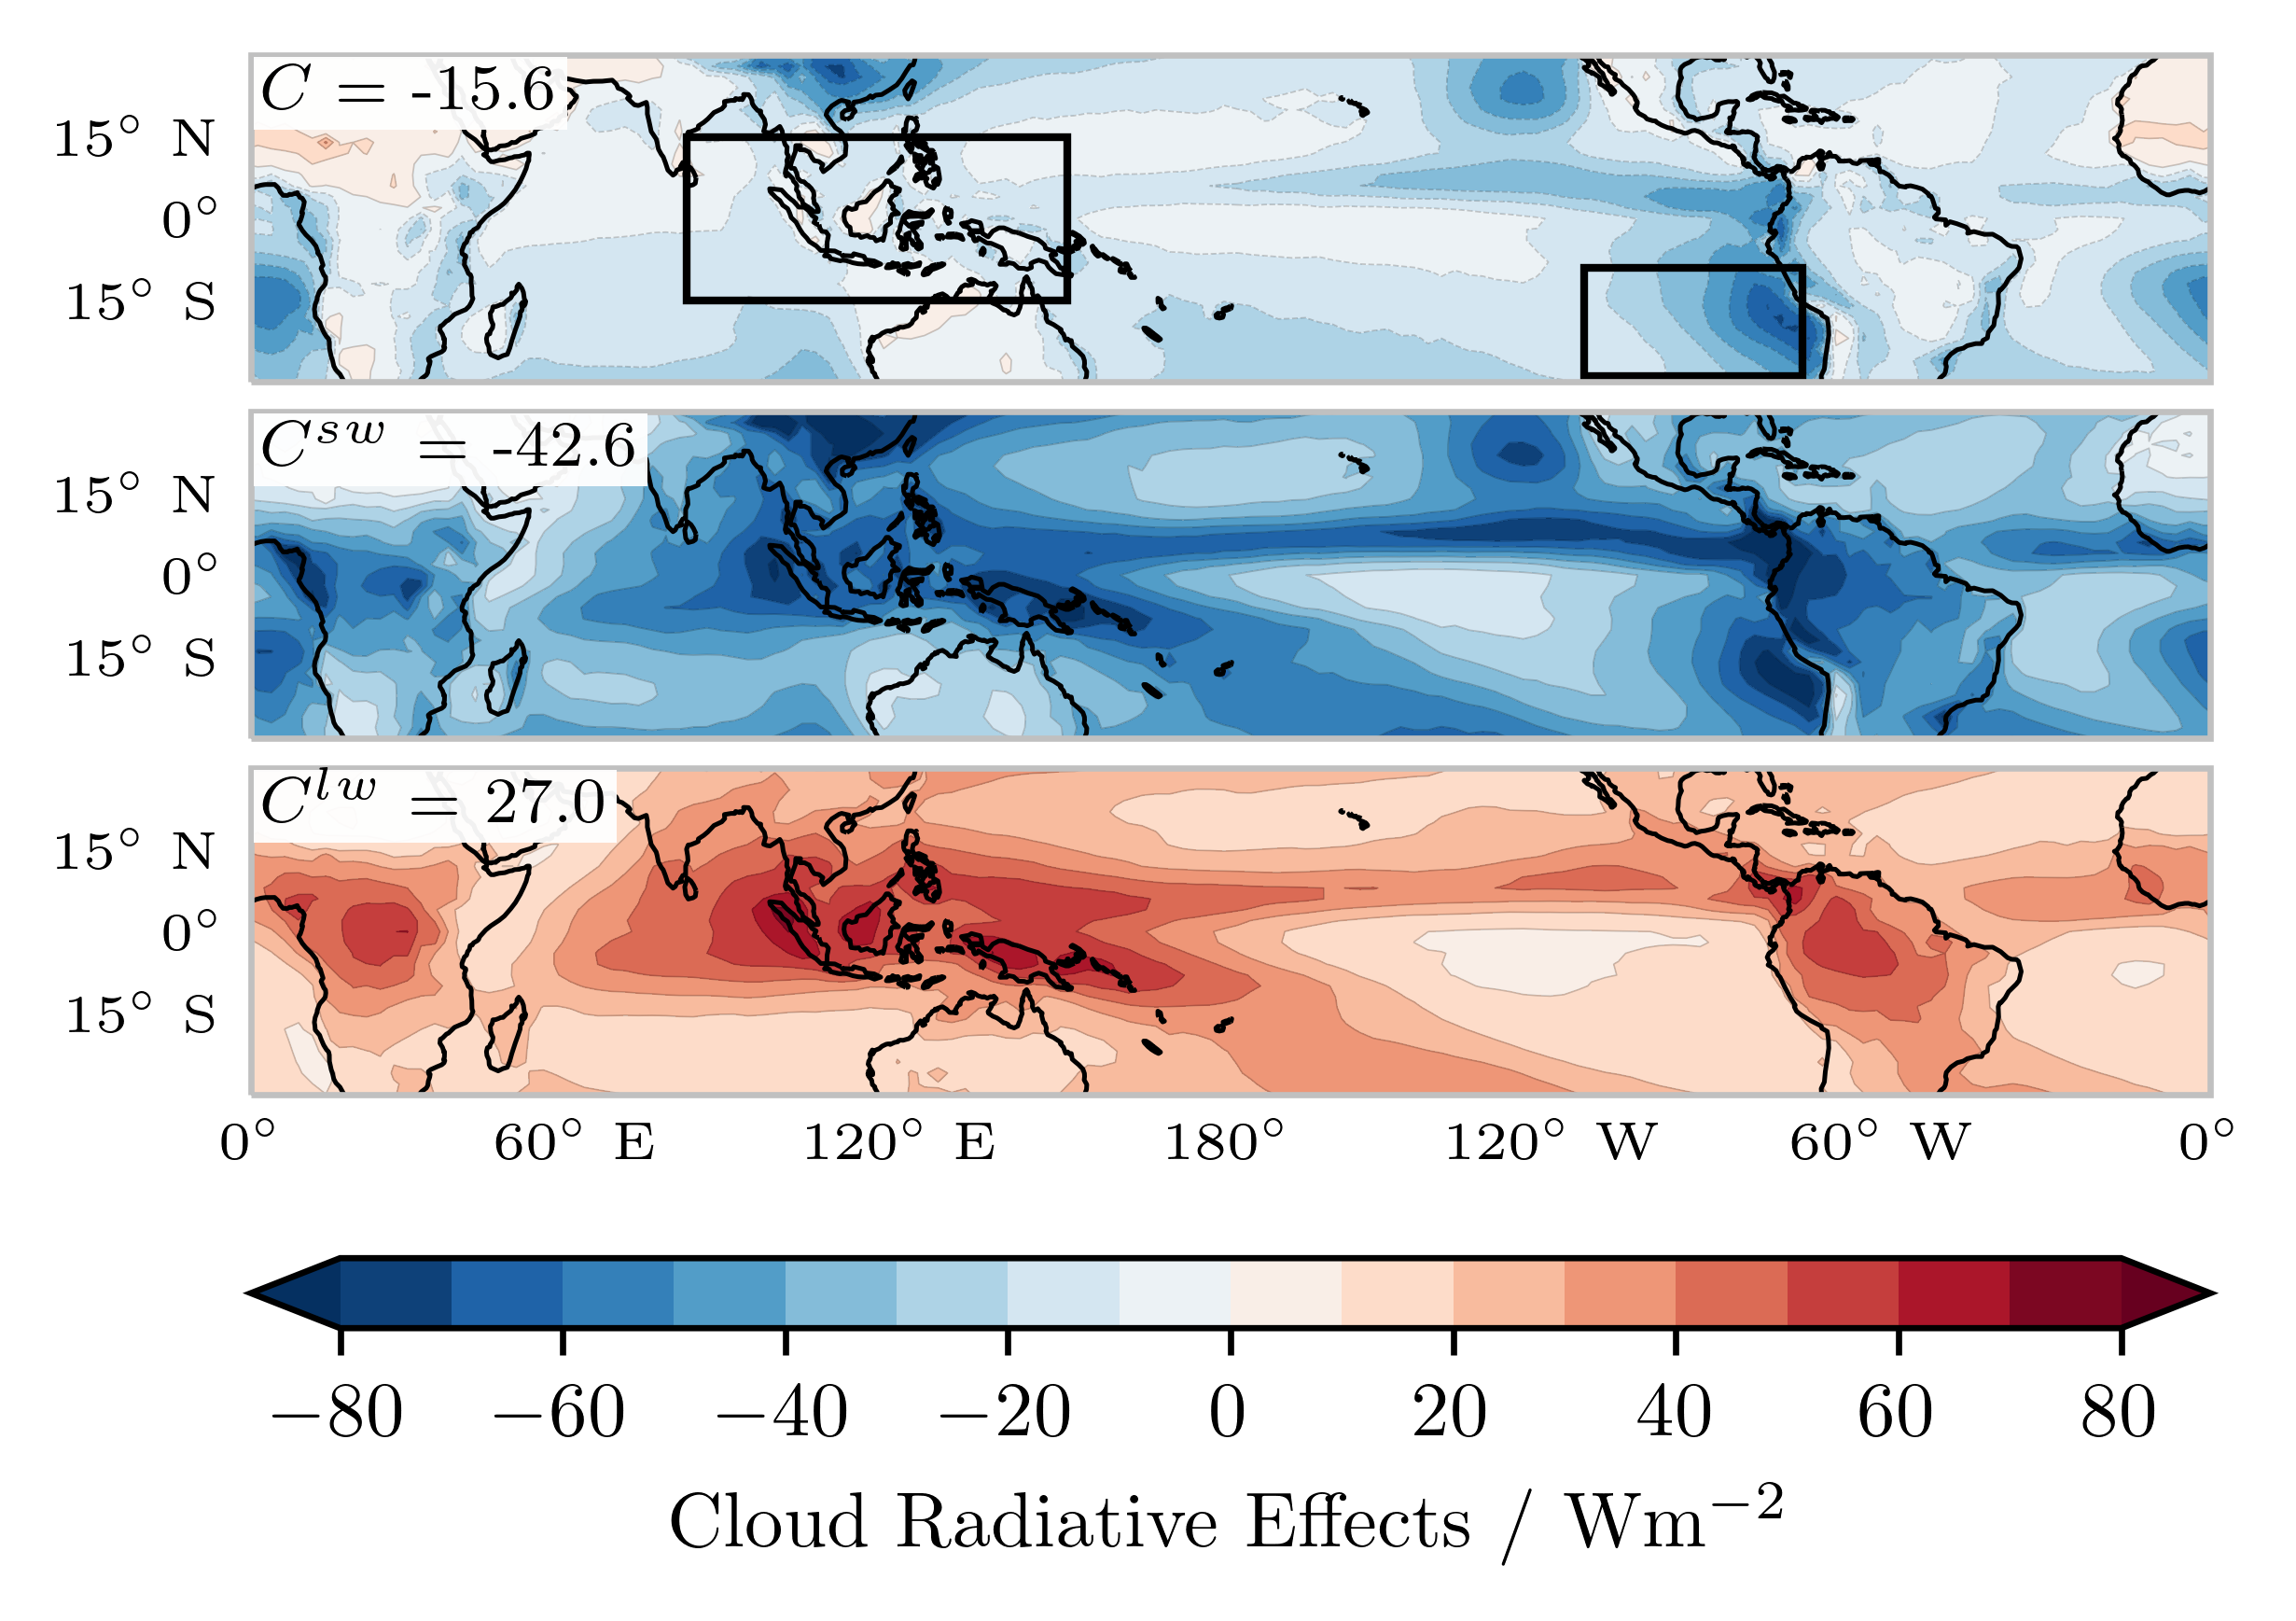

In [13]:
#####################################################################    
################ PLOT CERES CRE (Figure 3a) #########################
#####################################################################
fig, axes, cax = fc(3,1, width=4, aspect=60/180, bottom_pad=-0.5, cbar_mode='single', internal_pad = -0.53, cbar_pad=0., cbar_location = 'bottom', cbar_short_side_pad=0, axes_kwargs={'projection': ccrs.PlateCarree(central_longitude=180)})

lon = 0
ax = axes[0]
cmap='RdBu_r'
cdata, cyclic_lons = add_cyclic_point(ceres_cre.values, coord=ceres_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linewidths=0.2, alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C$ = '+str(np.round(ceres_cre_mean,1)), color='k',fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.tick_params(axis='x', colors='dimgray', width=0)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_xticklabels(['','','','','','',''],color='k', fontsize='x-small')


ax.add_patch(mpatches.Rectangle(xy=[80, -15], width=70, height=30, facecolor=None, edgecolor='k',
                                    alpha=1, fill=False,linewidth=1,transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-115, -29], width=40, height=20, facecolor=None, edgecolor='k',
                                    alpha=1, fill=False,linewidth=1,transform=ccrs.PlateCarree()))

ax = axes[1]
cdata, cyclic_lons = add_cyclic_point(ceres_cre_sw.values, coord=ceres_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linestyles='solid', linewidths=0.2, alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C^{sw}$ = '+str(np.round(ceres_cre_sw_mean,1)), color='k',fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver', width=0)
ax.set_xticklabels(['','','','','','',''],color='k', fontsize='x-small')


ax = axes[2]
cdata, cyclic_lons = add_cyclic_point(ceres_cre_lw.values, coord=ceres_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linewidths=0.2, linestyles='solid', alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C^{lw}$ = '+str(np.round(ceres_cre_lw_mean,1)), color='k',fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver', width=0)
ax.set_xticklabels([r'$0^\circ$',r'$60^\circ$ E', r'$120^\circ$ E', r'$180^\circ$', r'$120^\circ$ W', r'$60^\circ$ W', r'$0^\circ$'],color='k', fontsize='x-small')


for ax in axes:
    ax.tick_params(axis='both', direction='in', top=True, right=True, left=True, bottom=True)
    ax.spines['geo'].set_edgecolor('silver')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    
    ax.set_yticks([-15, 0, 15])
    ax.tick_params(axis='y', colors='silver', width=0)
    ax.set_yticklabels([r'$15^\circ$ S', r'$0^\circ$', r'$15^\circ$ N'],color='k', fontsize='x-small')

plt.colorbar(c1, cax=cax, orientation='horizontal', label='Cloud Radiative Effects / Wm$^{-2}$', ticks=np.linspace(-80,80,9), extend='both')

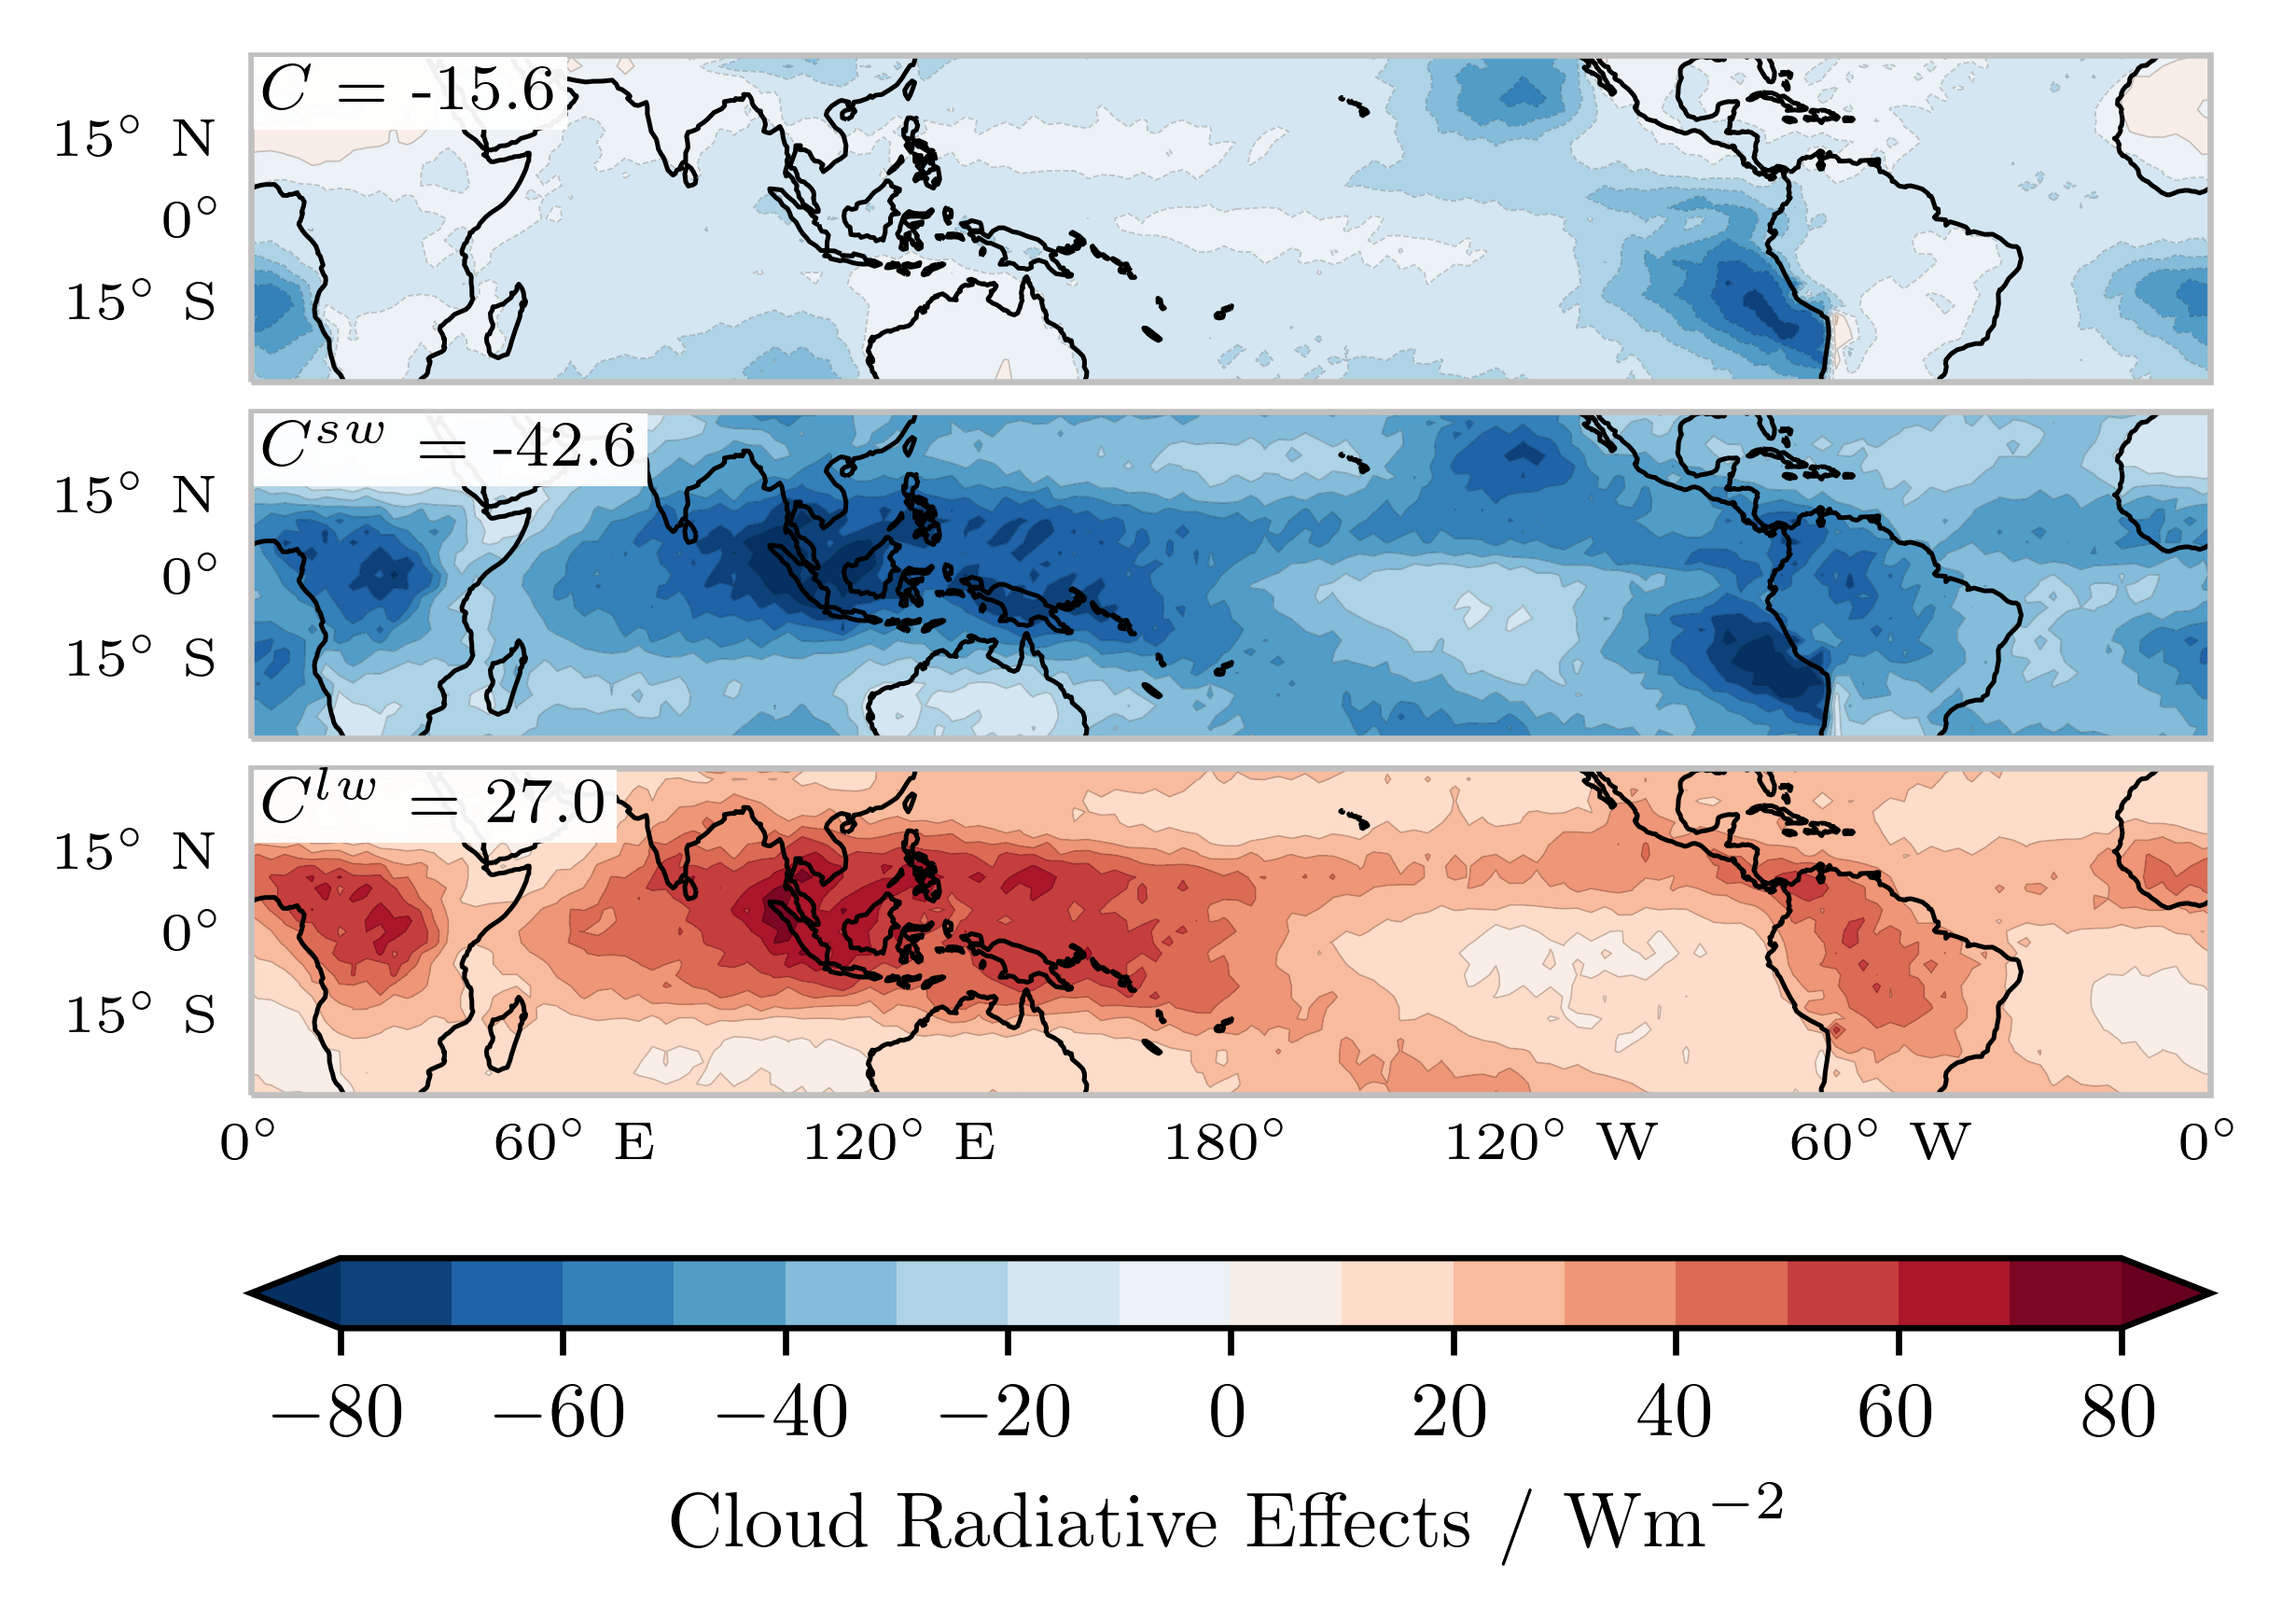

In [14]:
#####################################################################    
################ PLOT INFERRED CRE (Figure 3b) ######################
#####################################################################
fig, axes, cax = fc(3,1, width=4, aspect=60/180, bottom_pad=-0.5, cbar_mode='single', internal_pad = -0.53, cbar_pad=0., cbar_location = 'bottom', cbar_short_side_pad=0, axes_kwargs={'projection': ccrs.PlateCarree(central_longitude=180)})

lon = 0
ax = axes[0]
cmap='RdBu_r'
cdata, cyclic_lons = add_cyclic_point(inferred_cre.values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linewidths=0.2, alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C$ = '+str(np.round(inferred_cre_mean,1)), color='k',fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.tick_params(axis='x', colors='dimgray', width=0)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_xticklabels(['','','','','','',''],color='k', fontsize='x-small')

ax = axes[1]
cdata, cyclic_lons = add_cyclic_point(inferred_cre_sw.values, coord=ceres_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linestyles='solid', linewidths=0.2, alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C^{sw}$ = '+str(np.round(inferred_cre_sw_mean,1)), color='k',fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver', width=0)
ax.set_xticklabels(['','','','','','',''],color='k', fontsize='x-small')


ax = axes[2]
cdata, cyclic_lons = add_cyclic_point(inferred_cre_lw.values, coord=ceres_cre.lon.values)
c1 = ax.contourf(cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, inferred_cre.lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linewidths=0.2, linestyles='solid', alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C^{lw}$ = '+str(np.round(inferred_cre_lw_mean,1)), color='k',fontsize='small')
t1.set_bbox(dict(facecolor='white', alpha=0.95, linewidth=0,pad=1.))
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver', width=0)
ax.set_xticklabels([r'$0^\circ$',r'$60^\circ$ E', r'$120^\circ$ E', r'$180^\circ$', r'$120^\circ$ W', r'$60^\circ$ W', r'$0^\circ$'],color='k', fontsize='x-small')


for ax in axes:
    ax.tick_params(axis='both', direction='in', top=True, right=True, left=True, bottom=True)
    ax.spines['geo'].set_edgecolor('silver')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    
    ax.set_yticks([-15, 0, 15])
    ax.tick_params(axis='y', colors='silver', width=0)
    ax.set_yticklabels([r'$15^\circ$ S', r'$0^\circ$', r'$15^\circ$ N'],color='k', fontsize='x-small')

plt.colorbar(c1, cax=cax, orientation='horizontal', label='Cloud Radiative Effects / Wm$^{-2}$', ticks=np.linspace(-80,80,9), extend='both')

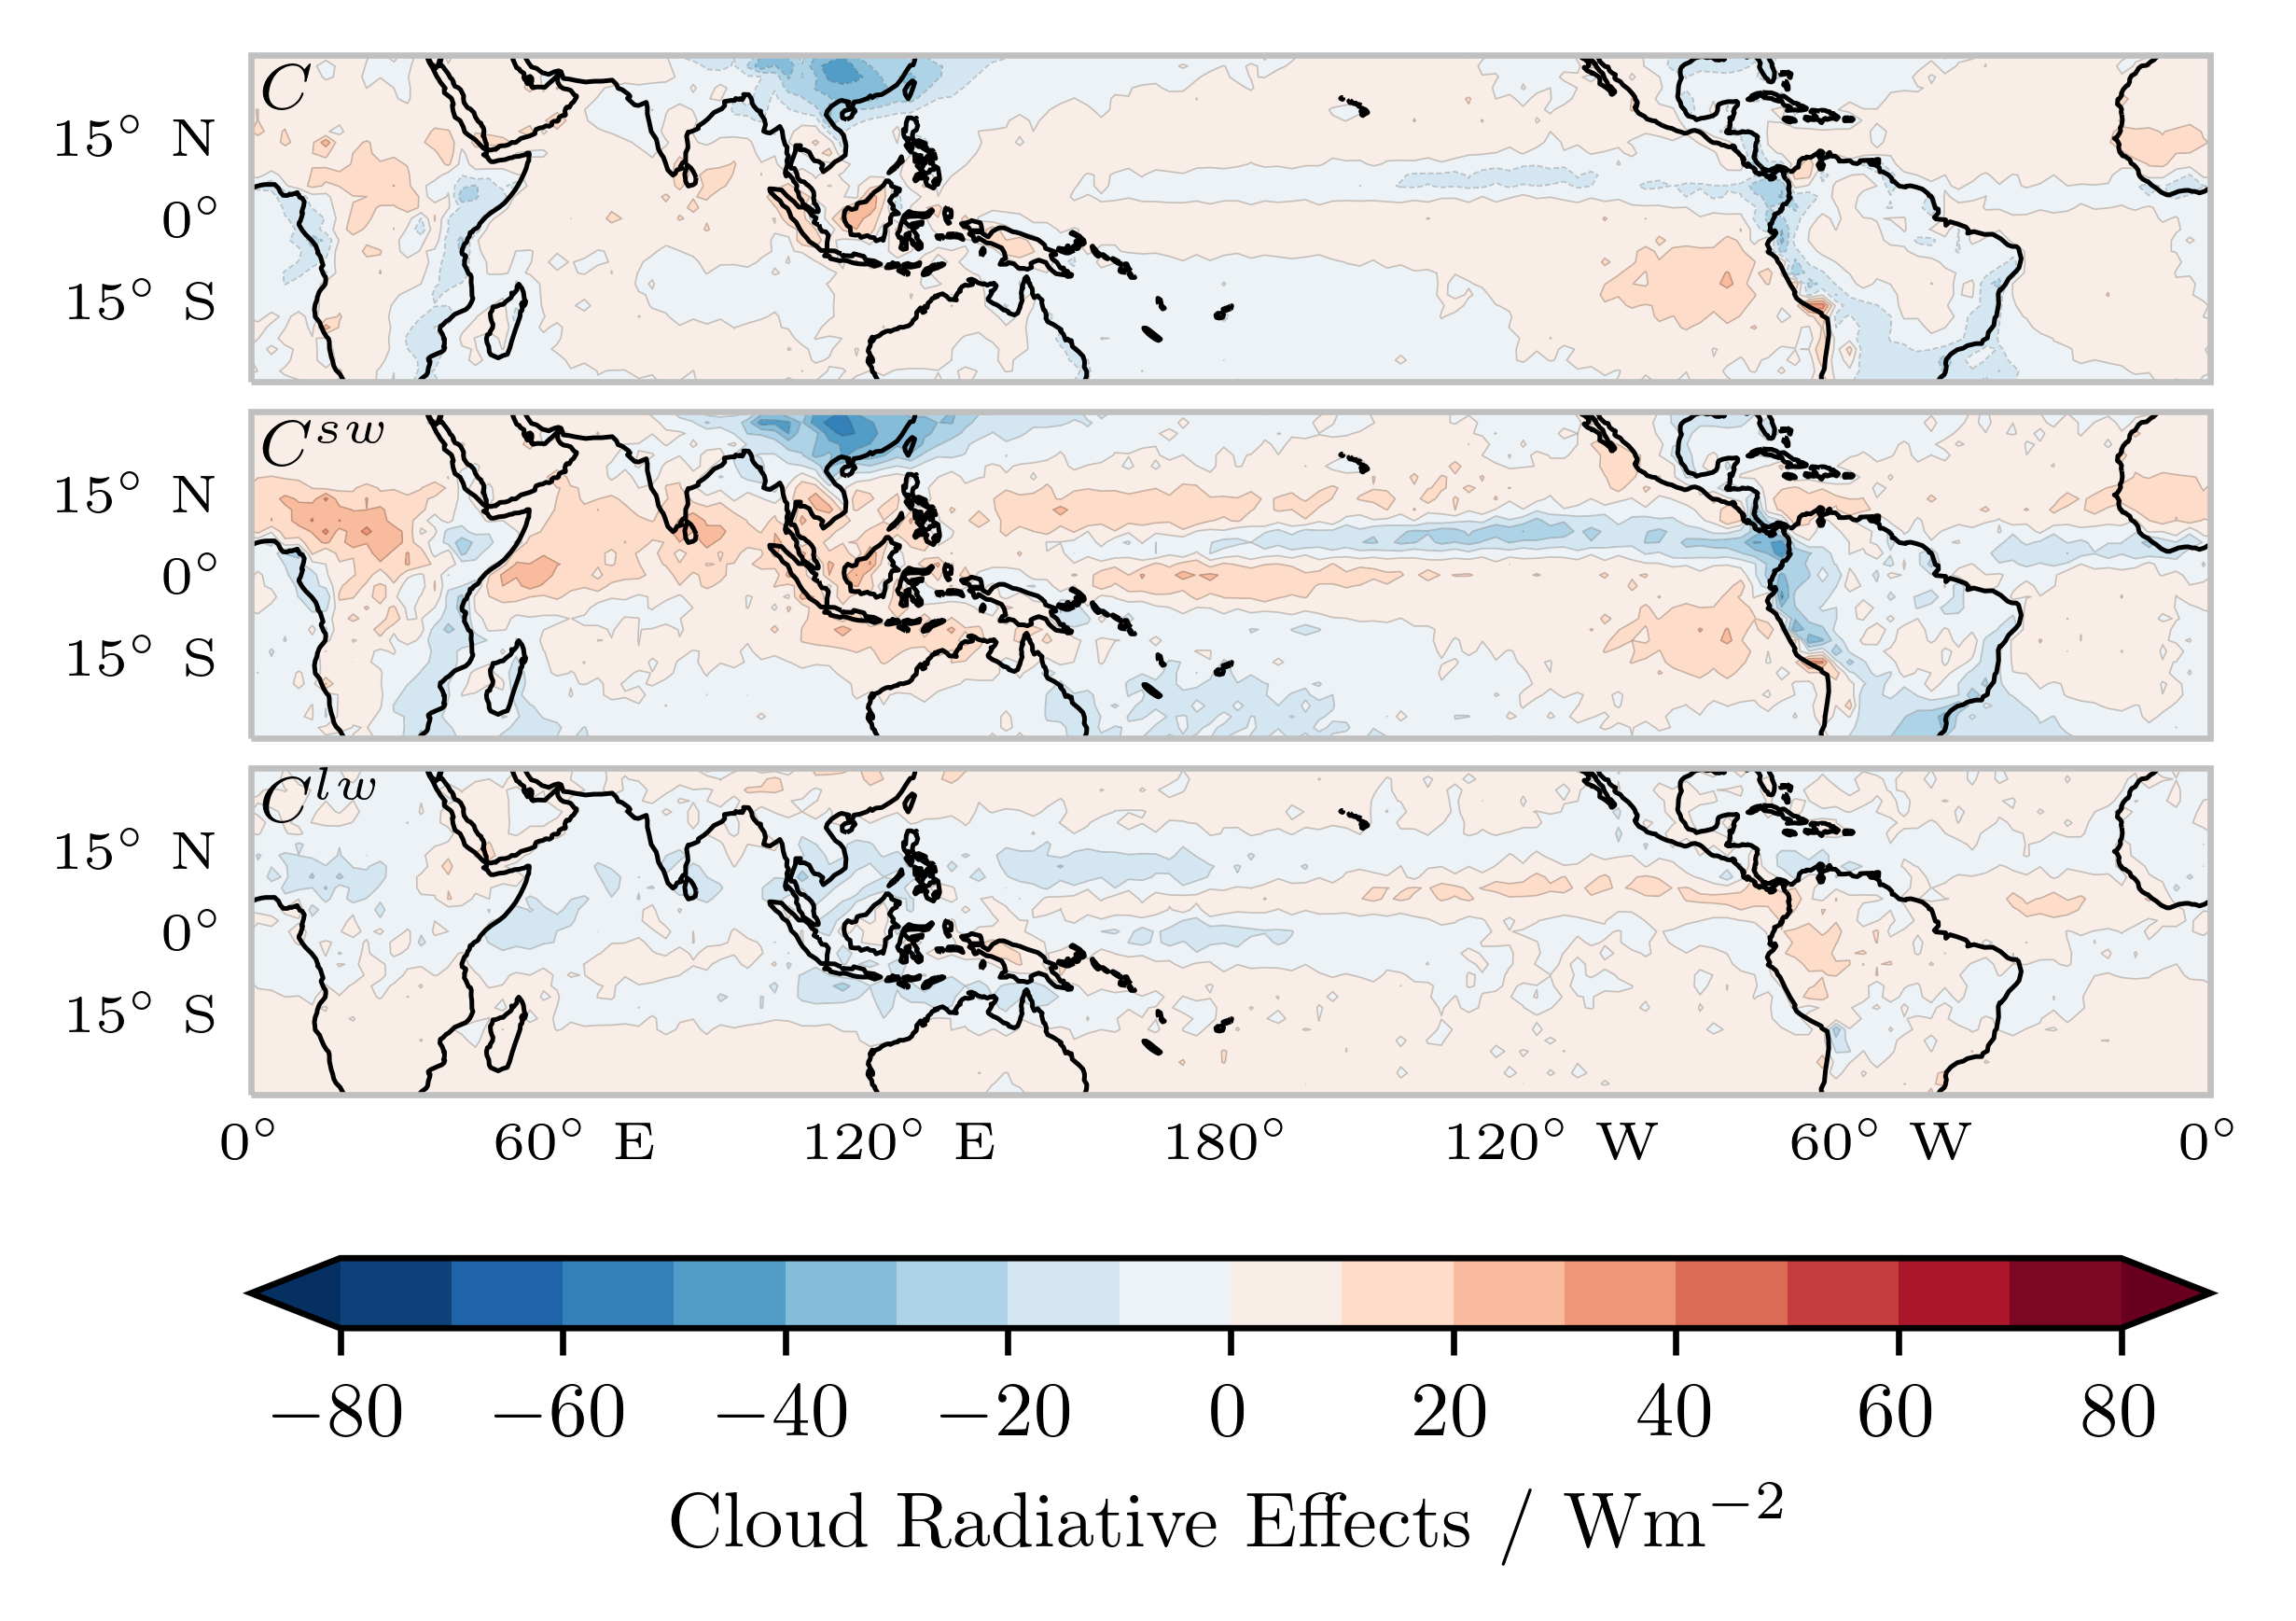

In [15]:
#####################################################################    
################ PLOT CRE DIFFERENCE (Figure 3b) ####################
#####################################################################
fig, axes, cax = fc(3,1, width=4, aspect=60/180, bottom_pad=-0.5, cbar_mode='single', internal_pad = -0.53, cbar_pad=0., cbar_location = 'bottom', cbar_short_side_pad=0, axes_kwargs={'projection': ccrs.PlateCarree(central_longitude=180)})

lon = 0
ax = axes[0]
cmap='RdBu_r'
cdata, cyclic_lons = add_cyclic_point((ceres_cre-inferred_cre).values, coord=inferred_cre.lon.values)
c1 = ax.contourf(cyclic_lons, (ceres_cre-inferred_cre).lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, (ceres_cre-inferred_cre).lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linewidths=0.2, alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C$', color='k',fontsize='small')
ax.tick_params(axis='x', colors='dimgray', width=0)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_xticklabels(['','','','','','',''],color='k', fontsize='x-small')

ax = axes[1]
cdata, cyclic_lons = add_cyclic_point((ceres_cre_sw-inferred_cre_sw).values, coord=ceres_cre.lon.values)
c1 = ax.contourf(cyclic_lons, (ceres_cre-inferred_cre).lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, (ceres_cre-inferred_cre).lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linestyles='solid', linewidths=0.2, alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C^{sw}$', color='k',fontsize='small')
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver', width=0)
ax.set_xticklabels(['','','','','','',''],color='k', fontsize='x-small')


ax = axes[2]
cdata, cyclic_lons = add_cyclic_point((ceres_cre_lw-inferred_cre_lw).values, coord=ceres_cre.lon.values)
c1 = ax.contourf(cyclic_lons, (ceres_cre-inferred_cre).lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), extend='both')
c2 = ax.contour( cyclic_lons, (ceres_cre-inferred_cre).lat.values, cdata, add_colorbar=False, vmin=-80, vmax=80, transform=ccrs.PlateCarree(central_longitude=lon), levels=np.linspace(-80,80,17), colors='k', linewidths=0.2, linestyles='solid', alpha=0.2, extend='both')
ax.set_title('')
ax.coastlines(linewidth=0.6)
t1 = ax.text(-178,20,'$C^{lw}$', color='k',fontsize='small')
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.tick_params(axis='x', colors='silver', width=0)
ax.set_xticklabels([r'$0^\circ$',r'$60^\circ$ E', r'$120^\circ$ E', r'$180^\circ$', r'$120^\circ$ W', r'$60^\circ$ W', r'$0^\circ$'],color='k', fontsize='x-small')


for ax in axes:
    ax.tick_params(axis='both', direction='in', top=True, right=True, left=True, bottom=True)
    ax.spines['geo'].set_edgecolor('silver')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    
    ax.set_yticks([-15, 0, 15])
    ax.tick_params(axis='y', colors='silver', width=0)
    ax.set_yticklabels([r'$15^\circ$ S', r'$0^\circ$', r'$15^\circ$ N'],color='k', fontsize='x-small')

plt.colorbar(c1, cax=cax, orientation='horizontal', label='Cloud Radiative Effects / Wm$^{-2}$', ticks=np.linspace(-80,80,9), extend='both')

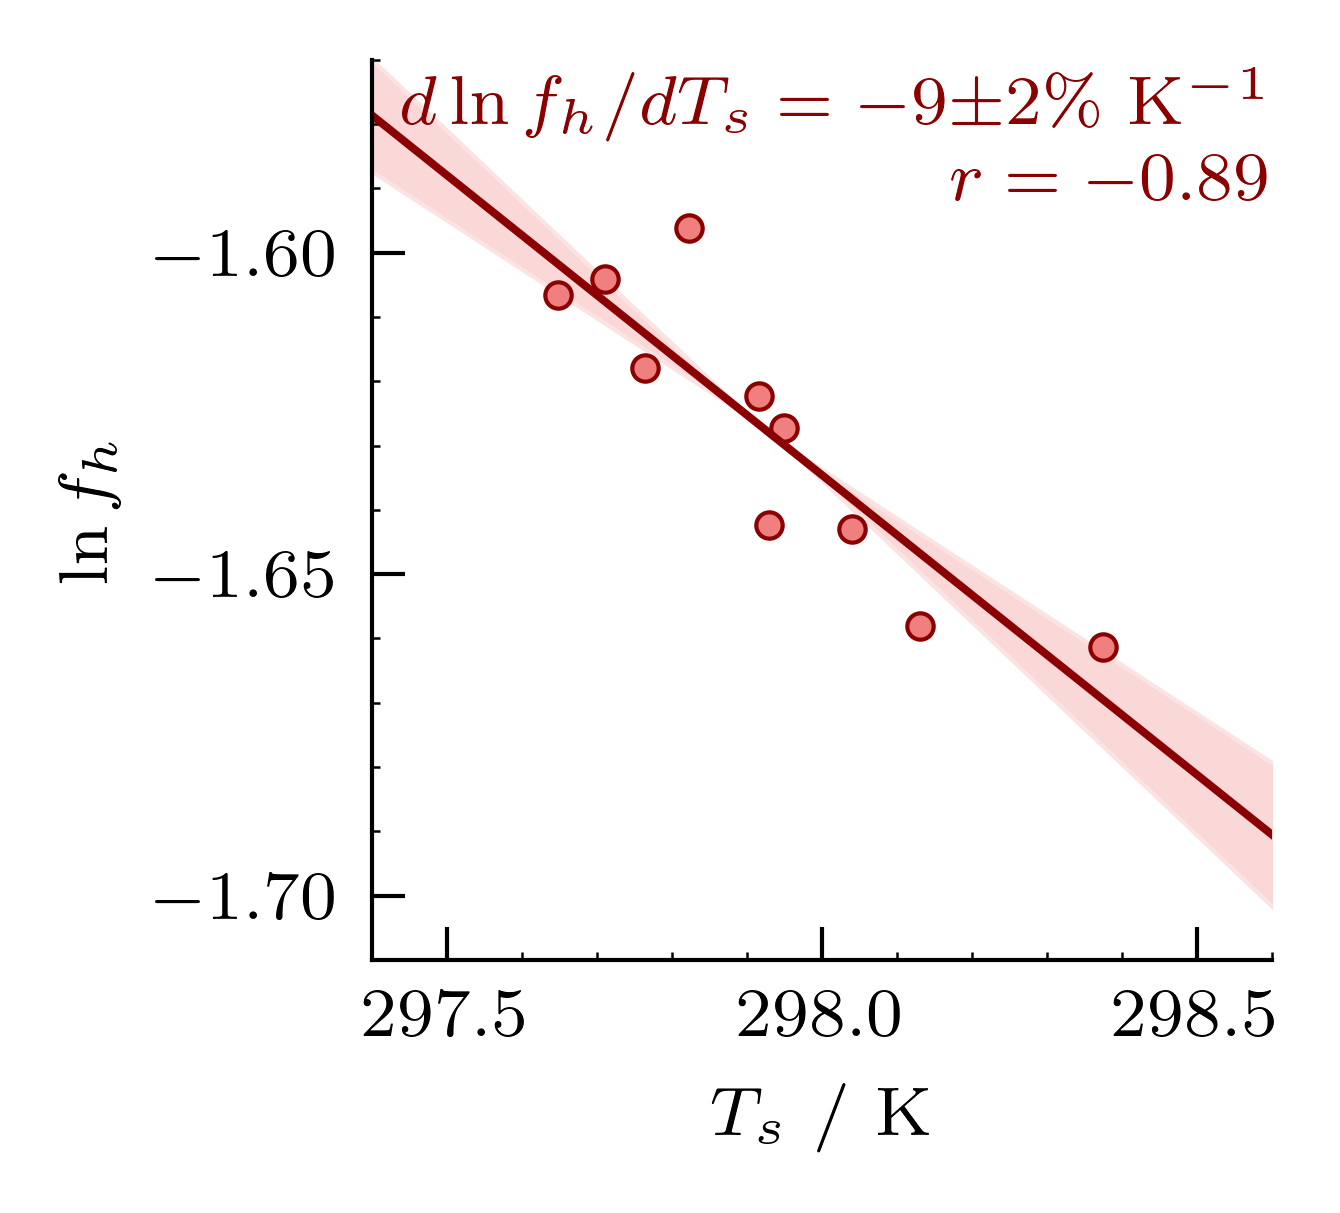

In [16]:
#####################################################################    
############# HIGH CLOUD FRACTION vs Ts (Figure 4a) #################
#####################################################################
width=2.
fig, axes = fc(1, 1, width=width, aspect=1, internal_pad=0)
ax = axes[0]
ppf.make_pretty_plot(ax, xmin=297.4, xmax=298.6, ymin=-2.28+0.57, ymax=-2.14+0.57, xlabel=r'$T_s$ / K',ylabel=r'$\ln f_h$',
                 control_ticks=True,delxmaj=0.5,delxmin=0.1,delymaj=0.05,delymin=0.01)

foo = sp.stats.linregress(ts_annual, fh_log_annual)
m, b, r, p, std_err = sp.stats.linregress(ts_annual, fh_log_annual)
intercept_stderr = foo.intercept_stderr

xn = np.linspace(np.min(ts_annual)-np.min(ts_annual)/1000,np.max(ts_annual)+np.max(ts_annual)/1000,100)
yn = np.polyval([m, b], xn)
ynlow = np.polyval([m+std_err, b-intercept_stderr], xn)
ynhigh = np.polyval([m-std_err, b+intercept_stderr], xn)

ax.text(298.6, -2.145+0.565, '$d \ln f_h/dT_s = -$'+str(int(np.abs(np.round(m,2)*100)))+r'$\pm$'+str(int(np.round(std_err,2)*100))+r'\% K$^{-1}$', fontsize='small', horizontalalignment='right', color='darkred')
ax.text(298.6, -2.157+0.565, '$r = -$'+str("{:.2}".format(np.abs(np.round(r,4)))), fontsize='small', horizontalalignment='right', color='darkred')

ax.scatter(ts_annual, fh_log_annual, color='darkred', s=10, zorder=2,alpha=1, facecolor='lightcoral', linewidth=0.5)
ax.plot(xn, yn, color='darkred', linestyle='solid', linewidth=0.95, dash_capstyle='round', zorder=2)
ax.fill_between(xn, ynlow, ynhigh, color='lightcoral', alpha=0.3, edgecolor='white')

Text(297.47, -0.52, '$r = $ 0.64')

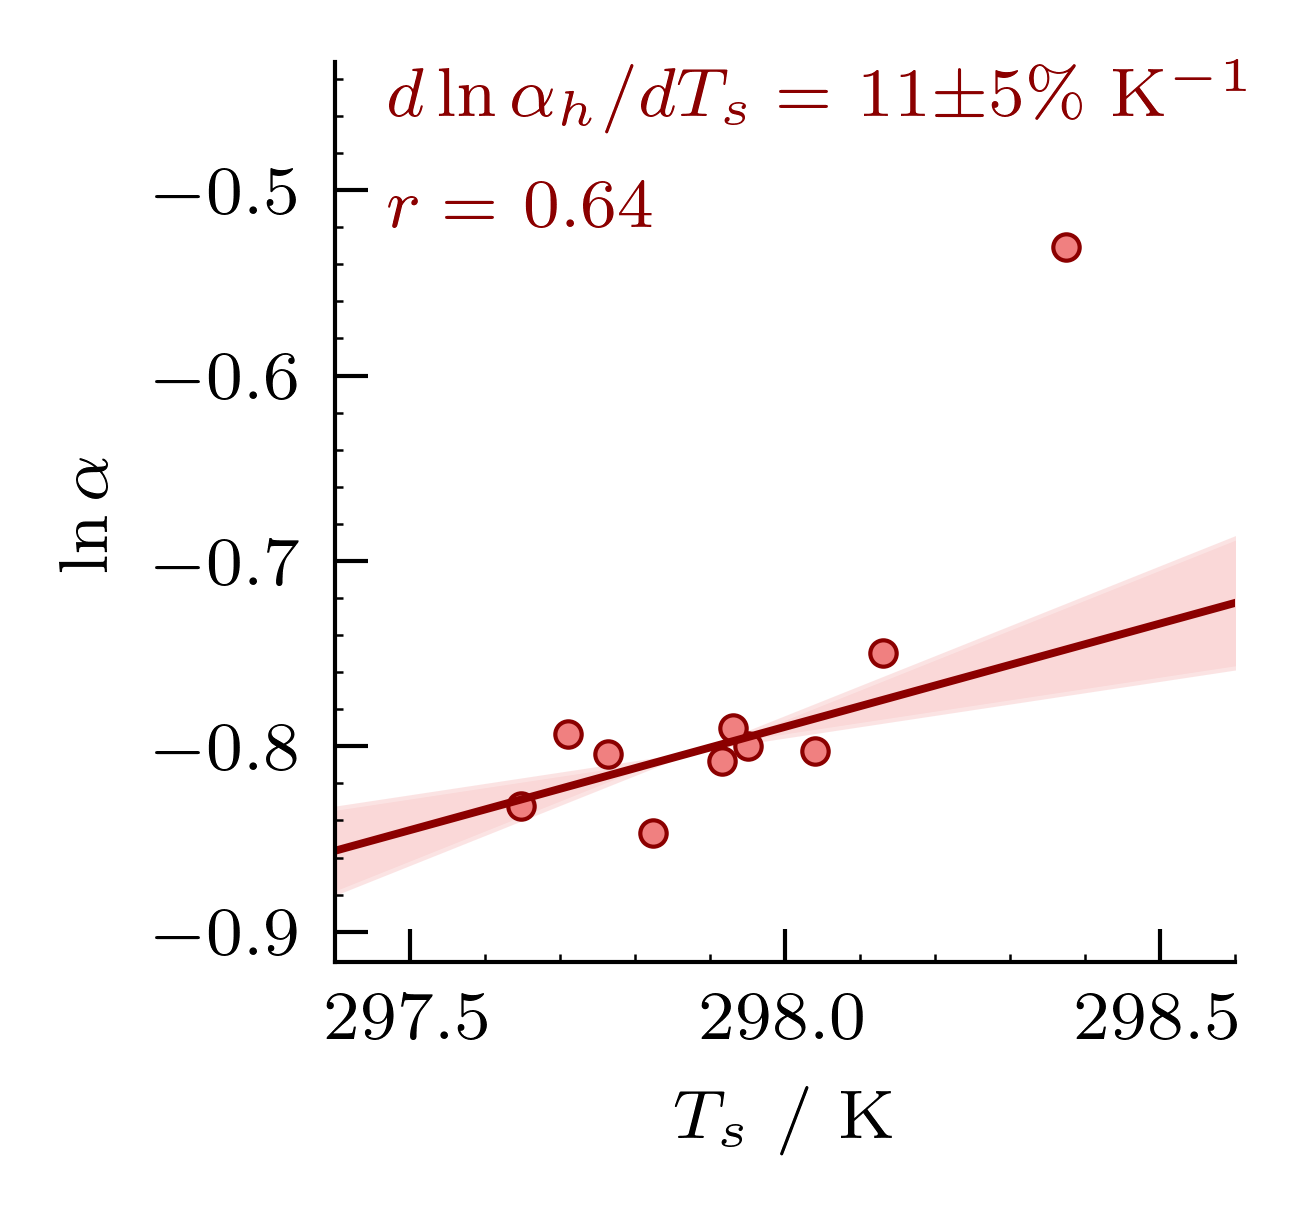

In [17]:
#####################################################################    
################### PLOT ALBEDO vs Ts (Figure 4b) ###################
#####################################################################
width=2.
fig, axes = fc(1, 1, width=width, aspect=1, internal_pad=0)
ax = axes[0]
ppf.make_pretty_plot(ax, xmin=297.4, xmax=298.6, ymin=np.log(0.4), ymax=np.log(0.65), xlabel=r'$T_s$ / K',ylabel=r'$\ln \alpha$',
                 control_ticks=True,delxmaj=0.5,delxmin=0.1,delymaj=0.1,delymin=0.02)

# get rid of 2015-2016 El Nino
ts_annual_reduced = ts_annual[:-1]
high_albedos_reduced = high_albedos[:-1]

foo = sp.stats.linregress(ts_annual_reduced, np.log(high_albedos_reduced))
m, b, r, p, std_err = sp.stats.linregress(ts_annual_reduced, np.log(high_albedos_reduced))
intercept_stderr = foo.intercept_stderr
xn = np.linspace(np.min(ts_annual)-np.min(ts_annual)/1000,np.max(ts_annual)+np.max(ts_annual)/1000,100)
yn = np.polyval([m, b], xn)
ynlow = np.polyval([m+std_err, b-intercept_stderr], xn)
ynhigh = np.polyval([m-std_err, b+intercept_stderr], xn)
ax.scatter(ts_annual, np.log(high_albedos), color='darkred', s=10, zorder=2,alpha=1, facecolor='lightcoral', linewidth=0.5)
ax.plot(xn, yn, color='darkred', linestyle='solid', linewidth=0.95, dash_capstyle='round', zorder=2)
ax.fill_between(xn, ynlow, ynhigh, color='lightcoral', alpha=0.3, edgecolor='white')
ax.text(297.47, -0.46, r'$d \ln \alpha_h / dT_s = $ '+str(int(np.round(m,2)*100))+r'$\pm$'+str(int(np.round(std_err,2)*100))+r'\% K$^{-1}$', fontsize='small', horizontalalignment='left', color='darkred')
ax.text(297.47, -0.52, '$r = $ '+str("{:.2}".format(np.round(r,4))), fontsize='small', horizontalalignment='left', color='darkred')